#### Basic Analysis of Stock Information

In [1]:
# Required libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

We'll use the following Tech companies for analysis:

In [2]:
# Tech company list: Apple, Microsoft, Amazon, Google
tech_list = ['AAPL','MSFT','AMZN','GOOG']

We'll be using Google to gather our data:

In [3]:
# Reading stock data from Google
from pandas_datareader import DataReader

# Timestamp information
from datetime import datetime

In [4]:
# Set the date to receive stock information from 1 year ago to current date
end = datetime.now()
start = datetime(end.year -1, end.month,end.day)

In [5]:
# Loop for grabbing finance data from Google as a DataFrame
for stock in tech_list:
    stock_df = DataReader(tech_list,'google',start,end)

Google automatically calculates Adjusted Closing price as the Closing column:

In [6]:
# Taking all Close stocks into one DataFrame and display preview of data
close_df =  stock_df['Close']
close_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-08-02,104.48,760.58,771.07,56.58
2016-08-03,105.79,754.64,773.18,56.97
2016-08-04,105.87,760.77,771.61,57.39
2016-08-05,107.48,765.98,782.22,57.96
2016-08-08,108.37,766.56,781.76,58.06


Let's examine the closing price of our stocks we gathered:

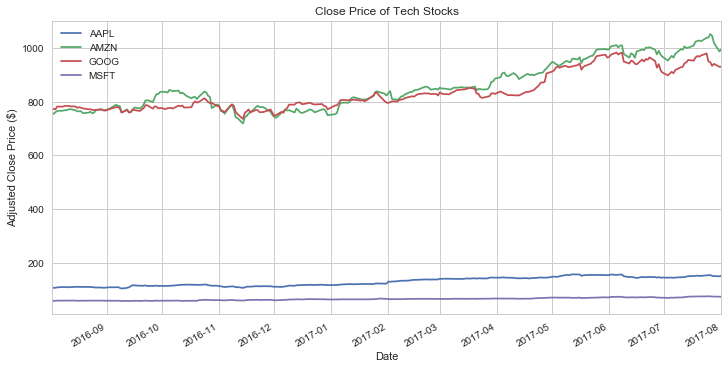

In [7]:
close_df.plot(legend=True,figsize=(12,6))

plt.ylabel('Adjusted Close Price ($)')
plt.title('Close Price of Tech Stocks')
plt.show()

In [8]:
# Taking all Volume stocks into one DataFrame and display preview of data
volume_df = stock_df['Volume']
volume_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-08-02,33816556.0,3603280.0,1784525.0,35121958.0
2016-08-03,30202641.0,3581525.0,1287421.0,22075616.0
2016-08-04,27408650.0,3178208.0,1140254.0,26587749.0
2016-08-05,40553402.0,2704391.0,1801205.0,29335221.0
2016-08-08,28037220.0,1986272.0,1107857.0,19473499.0


Let's examine the volume of stocks sold:

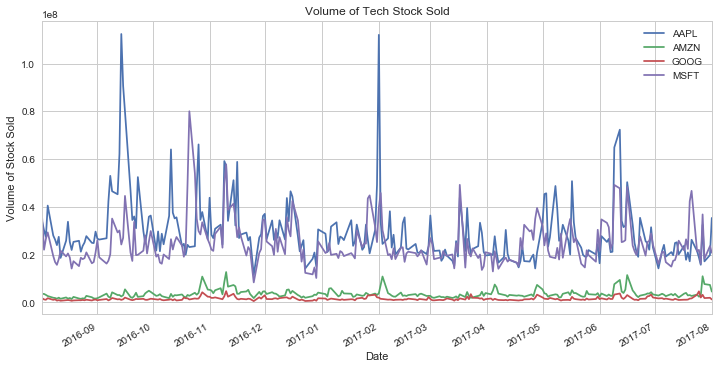

In [9]:
volume_df.plot(legend=True,figsize=(12,6))

plt.ylabel('Volume of Stock Sold')
plt.title('Volume of Tech Stock Sold')
plt.show()

#### Moving Averages

We'll now look at the moving averages for our stocks. A moving average is used to gauge the direction of the stock based on past prices for a certain time period, and predict potential change in an established trend.

In [10]:
# We'll seperate each tech company from our closing stock data
aapl = close_df['AAPL']
msft = close_df['MSFT']
amzn = close_df['AMZN']
goog = close_df['GOOG']

In [11]:
# Creating a new DataFrame for each company and calculating the moving averages for 10, 20 and 50 days
aapl_close = DataFrame(aapl,columns=['AAPL'])
aapl_close['MAVG 10 Days'] = msft.rolling(window=10).mean()
aapl_close['MAVG 20 Days'] = msft.rolling(window=20).mean()
aapl_close['MAVG 50 Days'] = msft.rolling(window=50).mean()

msft_close = DataFrame(msft,columns=['MSFT'])
msft_close['MAVG 10 Days'] = msft.rolling(window=10).mean()
msft_close['MAVG 20 Days'] = msft.rolling(window=20).mean()
msft_close['MAVG 50 Days'] = msft.rolling(window=50).mean()

amzn_close = DataFrame(amzn,columns=['AMZN'])
amzn_close['MAVG 10 Days'] = msft.rolling(window=10).mean()
amzn_close['MAVG 20 Days'] = msft.rolling(window=20).mean()
amzn_close['MAVG 50 Days'] = msft.rolling(window=50).mean()

goog_close = DataFrame(goog,columns=['GOOG'])
goog_close['MAVG 10 Days'] = msft.rolling(window=10).mean()
goog_close['MAVG 20 Days'] = msft.rolling(window=20).mean()
goog_close['MAVG 50 Days'] = msft.rolling(window=50).mean()

In [12]:
# Preview of Microsoft moving average data
msft_close.tail()

,MSFT,MAVG 10 Days,MAVG 20 Days,MAVG 50 Days
Date,,,,
2017-07-26,74.05,73.491,71.4265,70.6146
2017-07-27,73.16,73.630,71.5945,70.6896
2017-07-28,73.04,73.656,71.8220,70.8008
2017-07-31,72.70,73.591,72.0105,70.9006
2017-08-01,72.58,73.519,72.2310,70.9984


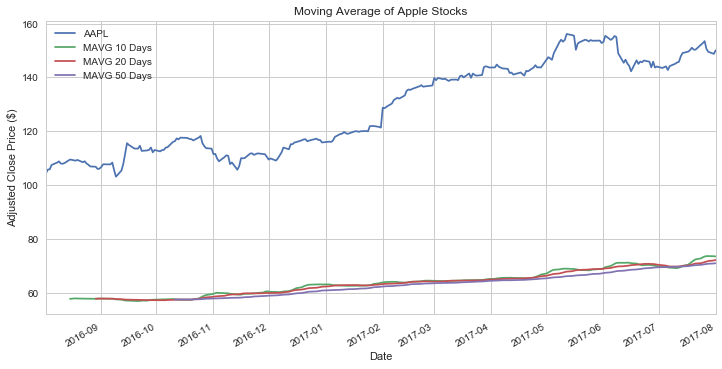

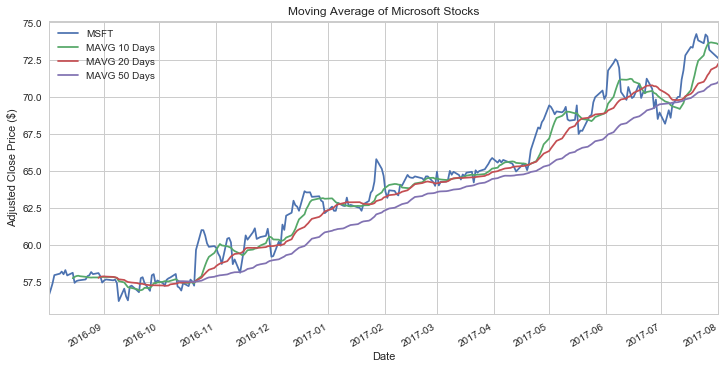

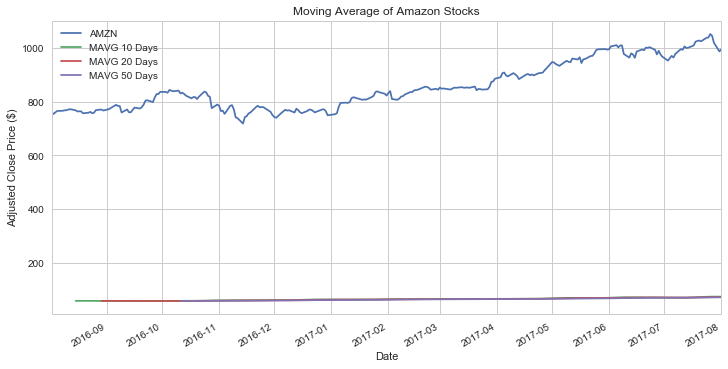

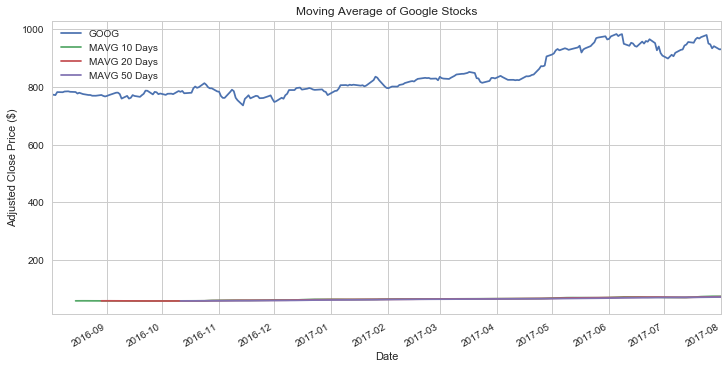

In [13]:
aapl_close.plot(legend=True,figsize=(12,6))
plt.ylabel('Adjusted Close Price ($)')
plt.title('Moving Average of Apple Stocks')
plt.show()

msft_close.plot(legend=True,figsize=(12,6))
plt.ylabel('Adjusted Close Price ($)')
plt.title('Moving Average of Microsoft Stocks')
plt.show()

amzn_close.plot(legend=True,figsize=(12,6))
plt.ylabel('Adjusted Close Price ($)')
plt.title('Moving Average of Amazon Stocks')
plt.show()

goog_close.plot(legend=True,figsize=(12,6))
plt.ylabel('Adjusted Close Price ($)')
plt.title('Moving Average of Google Stocks')
plt.show()

#### Daily Return Analysis

Daily return meansures the total daily return from a stock based on the price change from the close of one trading day to the close of the next trading day.

In [14]:
# Calculating the daily return of each tech company
tech_return = close_df.pct_change()
tech_return.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-08-02,NaN,NaN,NaN,NaN
2016-08-03,0.012538,-0.007810,0.002736,0.006893
2016-08-04,0.000756,0.008123,-0.002031,0.007372
2016-08-05,0.015207,0.006848,0.013750,0.009932
2016-08-08,0.008281,0.000757,-0.000588,0.001725


Display the daily returns of each company and comparing between stocks to see if there is a correlation.

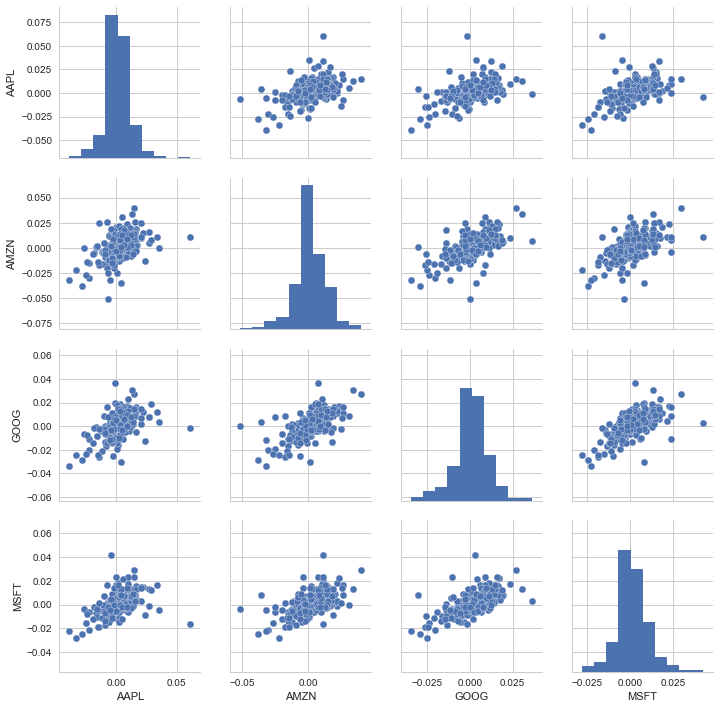

In [15]:
sns.pairplot(tech_return.dropna())
plt.show()

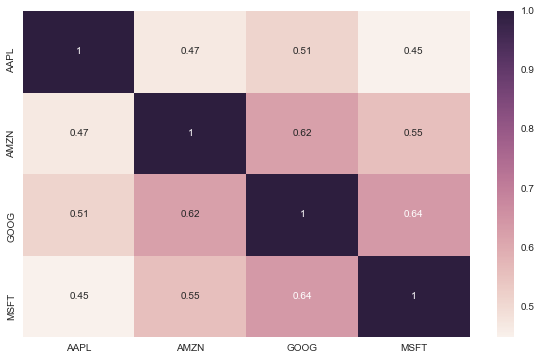

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(tech_return.corr(),annot=True)
plt.show()

#### Risk Return Evalution

A risk-return tradeoff is the principal that potential return rises with an increase of risk. Low levels of risk are associated with low potential returns, whereas high levels of risk aree associated with high potential returns.

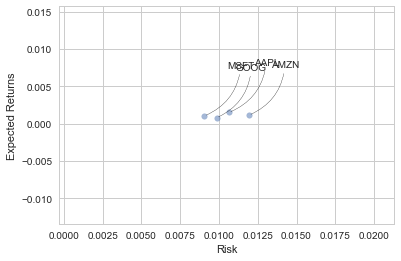

In [17]:
# Let's start by defining a new DataFrame as a cleaned version of the original return DataFrame
risk = tech_return.dropna()

# Changing the size of the dot for better visibility
area = np.pi*10 

plt.scatter(risk.std(), risk.mean(),alpha = 0.5,s =area)

# Set the plot axis titles
plt.xlabel('Risk')
plt.ylabel('Expected Returns')

# Labeling the scatter plot
for label, x, y in zip(risk.columns, risk.std(), risk.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'center',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))